In [4]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [5]:
# Set Eager API
tf.enable_eager_execution()
tfe = tf.contrib.eager

In [6]:
# Training Data
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

# Parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

In [7]:
# Weight and Bias
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

# Linear regression (Wx + b)
def linear_regression(inputs):
    return inputs * W + b

# Mean square error
def mean_square_fn(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2)) / (2 * n_samples)

In [8]:
# SGD Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

# Compute gradients
grad = tfe.implicit_gradients(mean_square_fn)

W0323 22:51:38.934239 14012 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Initial cost= 6.050009251 W= 1.0314479 b= -1.1239194
Epoch: 0001 cost= 2.044575691 W= 0.8058959 b= -1.1532667
Epoch: 0100 cost= 0.269782841 W= 0.500609 b= -0.9663125
Epoch: 0200 cost= 0.228191897 W= 0.47213367 b= -0.7644355
Epoch: 0300 cost= 0.195570439 W= 0.44691512 b= -0.5856474
Epoch: 0400 cost= 0.169984162 W= 0.42458087 b= -0.42730755
Epoch: 0500 cost= 0.149915814 W= 0.40480095 b= -0.28707683
Epoch: 0600 cost= 0.134175435 W= 0.38728327 b= -0.16288446
Epoch: 0700 cost= 0.121829607 W= 0.3717691 b= -0.052895952
Epoch: 0800 cost= 0.112146296 W= 0.35802928 b= 0.044513095
Epoch: 0900 cost= 0.104551278 W= 0.3458609 b= 0.13078143
Epoch: 1000 cost= 0.098594196 W= 0.33508426 b= 0.20718323


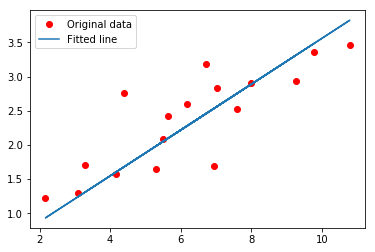

In [9]:
# Initial cost, before optimizing
print("Initial cost= {:.9f}".format(
    mean_square_fn(linear_regression, train_X, train_Y)),
    "W=", W.numpy(), "b=", b.numpy())

# Training
for step in range(num_steps):

    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))

    if (step + 1) % display_step == 0 or step == 0:
        print("Epoch:", '%04d' % (step + 1), "cost=",
              "{:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)),
              "W=", W.numpy(), "b=", b.numpy())

# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()